# import分はまとめる

In [131]:
import matplotlib.style
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import classification_report, roc_curve, auc 

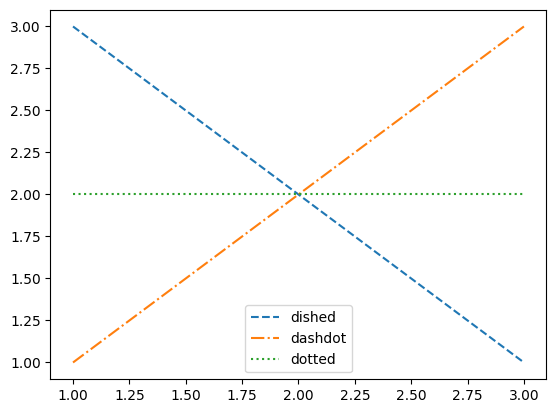

In [41]:
fig, ax = plt.subplots()
# 破線で描写
ax.plot([1,3],[3,1], linestyle='--', label='dished')
# 1点鎖栓で描写
ax.plot([1,3],[1,3], linestyle='-.', label='dashdot')
# 点線で描写
ax.plot([1,3],[2,2], linestyle=':', label='dotted')
ax.legend()

plt.show()

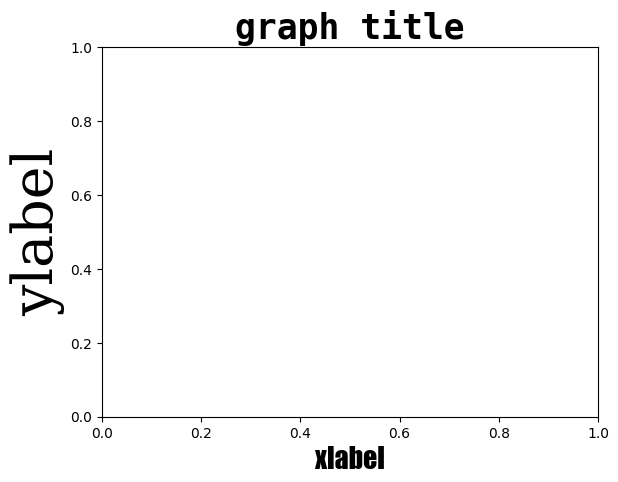

In [42]:
fig,ax = plt.subplots()

ax.set_xlabel('xlabel', family='fantasy', size=20, weight='bold')
ax.set_ylabel('ylabel', family='serif', size=40, weight='light')
ax.set_title('graph title', family='monospace', size=25, weight='heavy')

plt.show()

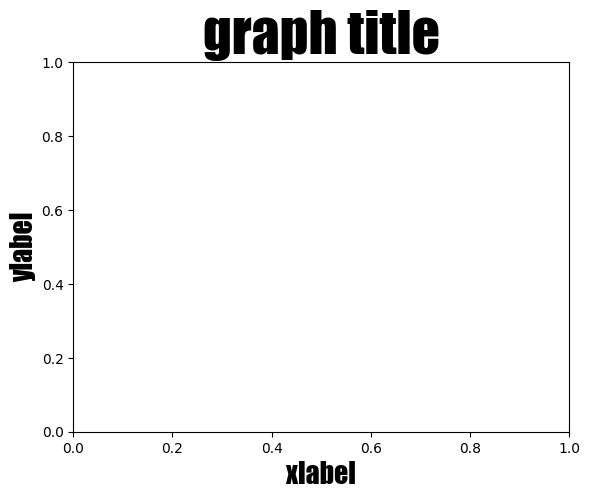

In [43]:
fontdict = {
    'family':'fantasy',
    'size':20,
    'weight':'normal'
}

fig,ax = plt.subplots()

ax.set_xlabel('xlabel',fontdict=fontdict)
ax.set_ylabel('ylabel', fontdict=fontdict)
# 個別指定で変更可能
ax.set_title('graph title', fontdict=fontdict, size=40)

plt.show()

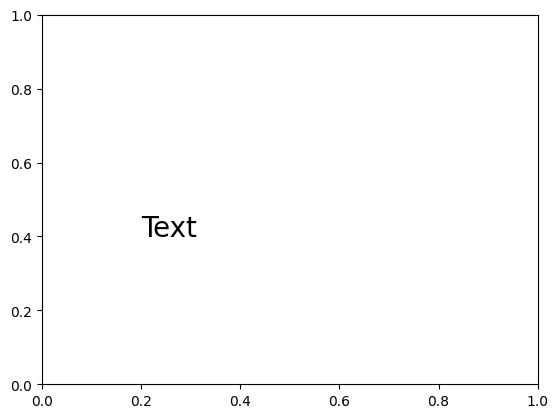

In [44]:
fig, ax = plt.subplots()

ax.text(0.2,0.4,'Text',size=20) # 'Text'というテキストを描画
plt.show()

## Pandasオブジェクトからの描写

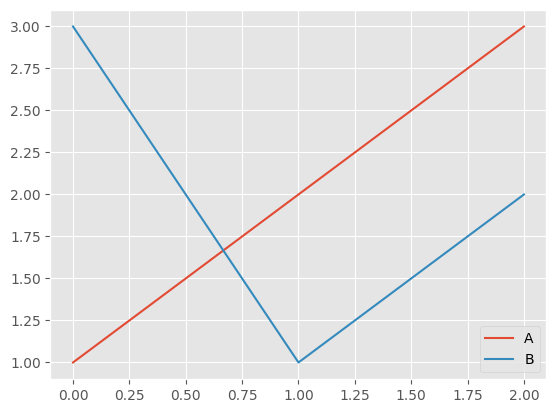

In [45]:
matplotlib.style.use('ggplot') # スタイルを指定

# DataFrameを作成
df = pd.DataFrame({'A':[1,2,3],
                   'B':[3,1,2],})
df.plot() # 折れ線グラフを描写
plt.show()

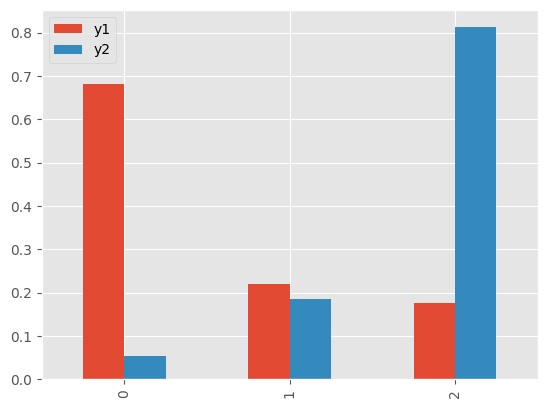

In [46]:
# ランダムな2行3列のデータを作成する
rng = np.random.default_rng(123)
df_rng = pd.DataFrame(rng.random((3,2)),
                      columns=['y1','y2'])
df_rng.plot.bar() # 棒グラフを描写
plt.show()

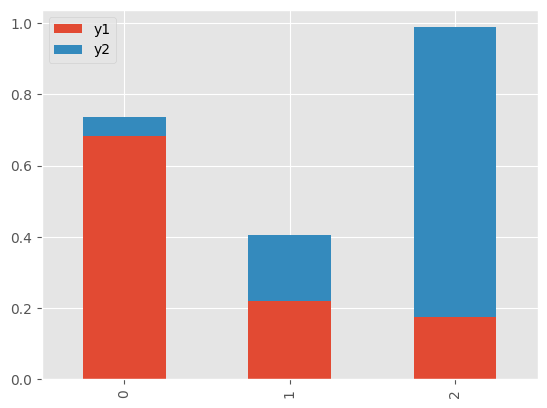

In [47]:
df_rng.plot.bar(stacked=True)
plt.show()

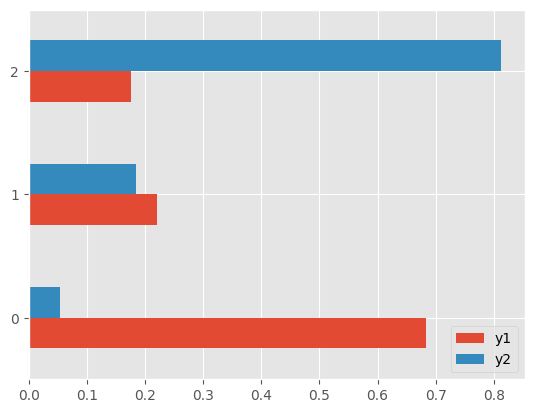

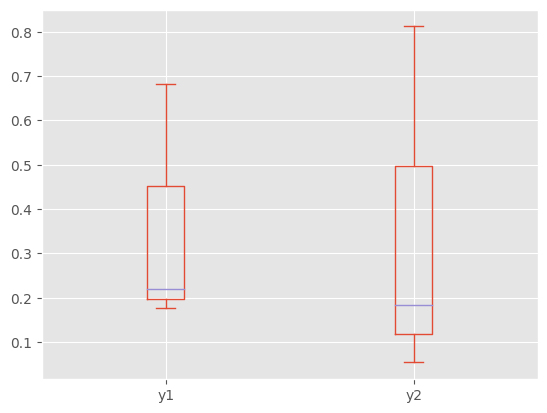

In [48]:
df_rng.plot.barh()
df_rng.plot.box()
plt.show()

# sckit-learn

In [49]:
# サンプルのデータセットを作成
df = pd.DataFrame({
    'A':[1, np.nan, 3, 4, 5],
    'B':[6, 7, 8, np.nan, 10],
    'C':[11, 12, 13, 14, 15]
})
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


## 簡単な欠損処理

In [50]:
# 欠損値の確認
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [51]:
# Sklearnのライブラリで平均値を埋めるのは初
imp = SimpleImputer(strategy='mean')
# 欠損値の補完
imp.fit_transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

## カテゴリ変数の処理

In [52]:
df = pd.DataFrame({
    'A':[1, 2, 3, 4, 5],
    'B':['a', 'b', 'a', 'b', 'c']
})
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [53]:
# ラベルエンコーダのインスタンスを作成
le = LabelEncoder()
# ラベルエンコーディング
le.fit_transform(df.loc[:,'B'])

array([0, 1, 0, 1, 2])

In [54]:
# 元の値を確認
le.classes_

array(['a', 'b', 'c'], dtype=object)

## OneHotエンコーディング

In [55]:
# DFのコピー
df_ohe = df.copy()
# ラベルエンコーダのインスタンス化
le = LabelEncoder()
# 英語の'a', 'b', 'c'を0,1,2へ変換
df_ohe.loc[:,'B'] = le.fit_transform(df_ohe.loc[:,'B'])

# OneHotエンコーダのインスタンス化[1]はカラムを指定
ohe = ColumnTransformer([('OneHotEncoder',
                         OneHotEncoder(),[1])],
                        remainder='passthrough')
# OneHotエンコーディング
df_ohe = ohe.fit_transform(df_ohe)
df_ohe

array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

## 特徴量の正規化

In [56]:
# dfを作成する
df = pd.DataFrame({
    'A':[1,2,3,4,5],
    'B':[100,200,300,400,800]
})
df

,A,B
0,1,100
1,2,200
2,3,300
3,4,400
4,5,800


### 分散正規化

In [57]:
# 分散正規化のインスタンスを作成
stdsc = StandardScaler()
# 分散正規化を実行
stdsc.fit_transform(df)

array([[-1.41421356, -1.07588766],
       [-0.70710678, -0.66208471],
       [ 0.        , -0.24828177],
       [ 0.70710678,  0.16552118],
       [ 1.41421356,  1.82073295]])

### 最小最大正規化

In [58]:
# 最小最大正規化のインスタンスの作成
mmsc = MinMaxScaler()
# 最小最大正規化の実行
mmsc.fit_transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.28571429],
       [0.75      , 0.42857143],
       [1.        , 1.        ]])

## 分類

In [59]:
# irisのデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 先頭の5行を表示
print('X:')
print(X[:5,:])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [60]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(105, 4)
(105,)
(45,)


### SVM
- 分類・回帰だけではなく外れ値にも使えるアルゴリズム

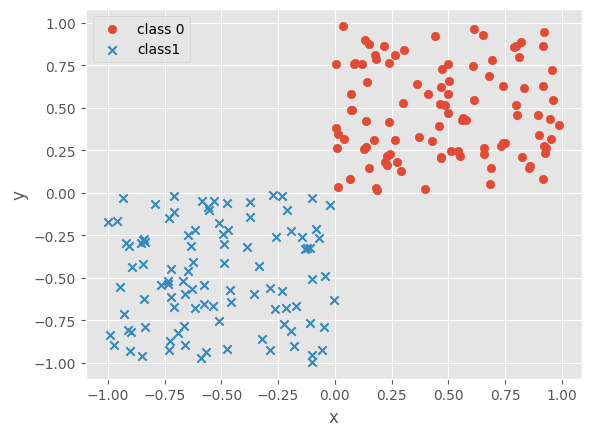

In [64]:
rng = np.random.default_rng(123)

# x軸y軸ともに0から1までの一様分布から100点をサンプリング
X0 = rng.uniform(size=(100,2))
# クラス0のラベルを100個作成
y0 = np.repeat(0,100)

# x軸y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = rng.uniform(-1,0.0,size=(100,2))
# クラス1のラベルを作成
y1 = np.repeat(1, 100)

# 散布図にプロット
fig, ax = plt.subplots()

ax.scatter(X0[:,0],X0[:,1],
           marker='o', label='class 0')

ax.scatter(X1[:,0],X1[:,1],
           marker='x', label='class1')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

In [69]:
# 学習、および決定境界、マージン、サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0,y0,X1,y1,kernel,C,
                            xmin=-1,xmax=1,ymin=-1,ymax=1):
    # サポートベクターマシンのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    # 学習
    svc.fit(np.vstack((X0,X1)),np.hstack((y0,y1)))
    
    fig,ax = plt.subplots()
    ax.scatter(X0[:,0],X0[:,1],marker='o',label='class 0')
    ax.scatter(X1[:,0],X1[:,1],marker='x',label='class 1')
    # 決定境界線とマージンをプロット
    xx,yy = np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))
    xy = np.vstack([xx.ravel(),yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100,100))
    ax.contour(xx,yy,p,
               colors='k',levels=[-1,0,1],
               alpha=0.5,linestyles=['--','-','--'])
    # サポートベクタのプロット
    ax.scatter(svc.support_vectors_[:,0],
               svc.support_vectors_[:,1],
               s=250,facecolors='none',
               edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

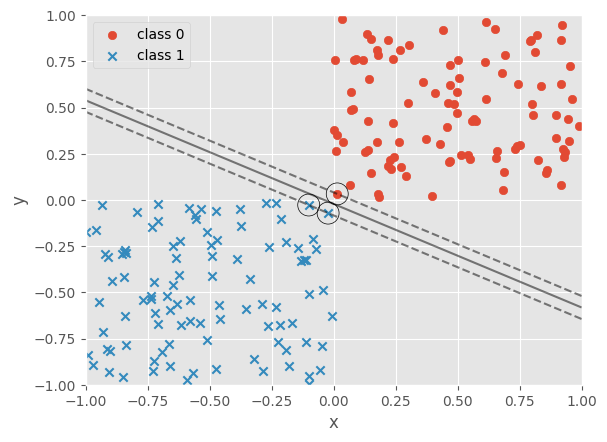

In [70]:
# 決定境界線、マージン、サポートベクタをプロット
plot_boundary_margin_sv(X0,y0,X1,y1,kernel='linear',C=1e6) # 1e6は10の6乗

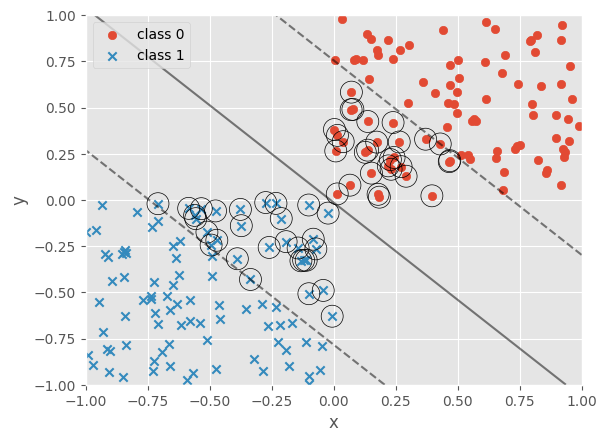

In [72]:
# 決定境界線、マージン、サポートベクタをプロット
plot_boundary_margin_sv(X0,y0,X1,y1, kernel='linear', C=0.1)

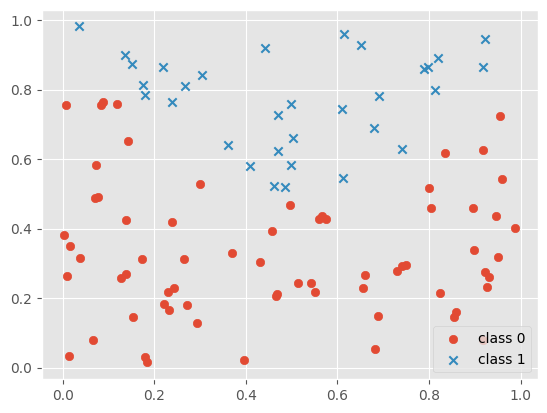

In [74]:
rng = np.random.default_rng(123)
X = rng.random(size=(100,2))
y = (X[:,1] > 2 * (X[:,0]-0.5)**2 + 0.5).astype(int)

fig, ax = plt.subplots()
ax.scatter(X[y==0,0],X[y==0,1],marker='o',label='class 0')
ax.scatter(X[y==1,0],X[y==1,1],marker='x',label='class 1')
ax.legend()
plt.show()

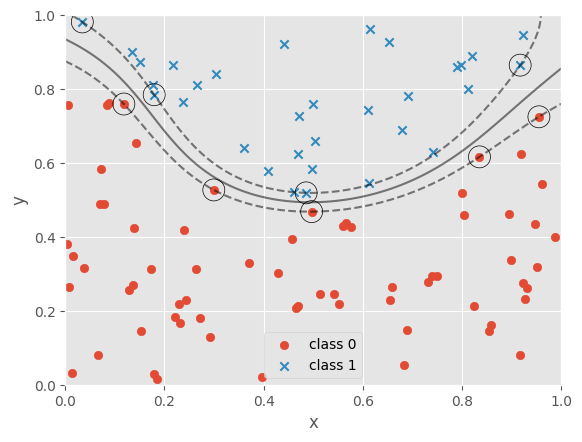

In [75]:
# 決定境界、マージン、サポートベクタをプロット
X0, X1 = X[y==0,:], X[y==1,:]
y0, y1 = y[y==0], y[y==1]
plot_boundary_margin_sv(X0, y0, X1, y1,kernel='rbf', C=1e3, xmin=0,ymin=0)

### 決定木

In [85]:
# irisのデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
print(f'X:{X.shape}')
print(f'y:{y.shape}')
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# 決定木をインスタンス化(木の深さ=3)
tree = DecisionTreeClassifier(max_depth=3, random_state=123)
# 学習
tree.fit(X_train,y_train)

X:(150, 4)
y:(150,)


DecisionTreeClassifier(max_depth=3, random_state=123)

In [91]:
# dot形式のデータを抽出
dot_data = export_graphviz(tree, filled=True,rounded=True,
                           class_names=['Satosa','Versicolor','Virginica'],
                           feature_names=['Sepal Length','Sepal Width','Petal Length', 'Petal Width'],
                           out_file=None)
# 決定木のプロットを出力
graph =graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [92]:
# 予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

### ランダムフォレスト

In [94]:
# ランダムフォレストをインスタンス化
forest = RandomForestClassifier()

# 学習
forest.fit(X_train, y_train)
# 予測
y_pred =forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## 回帰

In [96]:
# データセットを読み込む
housing =fetch_california_housing()
X, y = housing.data, housing.target
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=123)
# 線形回帰のインスタンス化
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
# データの予測
y_pred = lr.predict(X_test)

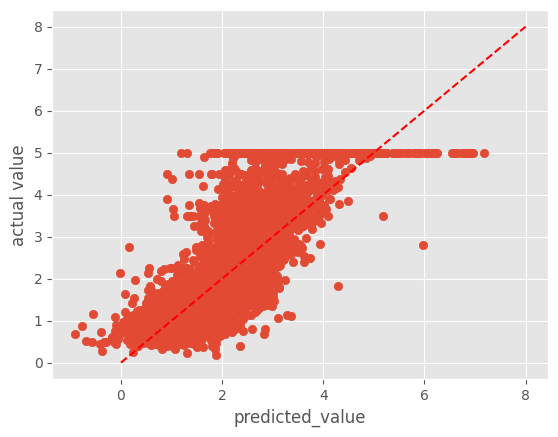

In [100]:
# 横軸を予測値、縦軸を実績値としてプロットする
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0,8),(0,8),linestyle='dashed', color='red')
ax.set_xlabel('predicted_value')
ax.set_ylabel('actual value')

plt.show()

### 主成分分析

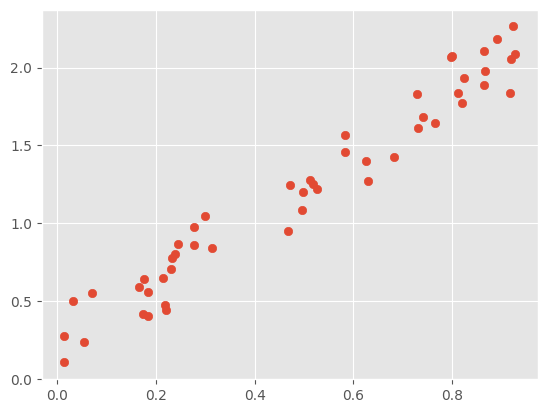

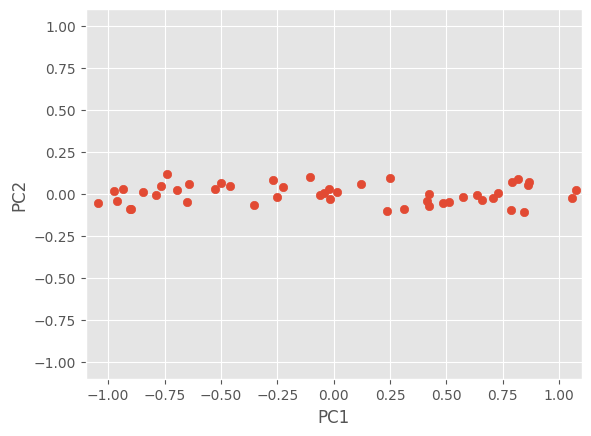

In [108]:
# シード値を固定
rng = np.random.default_rng(123)
# 0以上1未満の一様乱数を生成
X = rng.uniform(size=50)
# Xを2倍したあとに、0以上1未満の一様乱数に0.5倍して足し合わせる
y = 2*X + 0.5*rng.uniform(size=50)
# 散布図をプロット
fig, ax = plt.subplots()
ax.scatter(X,y)
plt.show()
# 主成分分析のインスタンス化
pca = PCA(n_components=2)
# 主成分分析の実行
X_pca = pca.fit_transform(np.hstack((X.reshape(-1,1),y.reshape(-1,1)))) # 1次元配列を無理やり2次元配列にreshape
# 主成分分析で得られた結果をプロット
fig,ax = plt.subplots()
ax.scatter(X_pca[:,0],X_pca[:,1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
plt.show()

- Irisのデータセットを使用してPCA

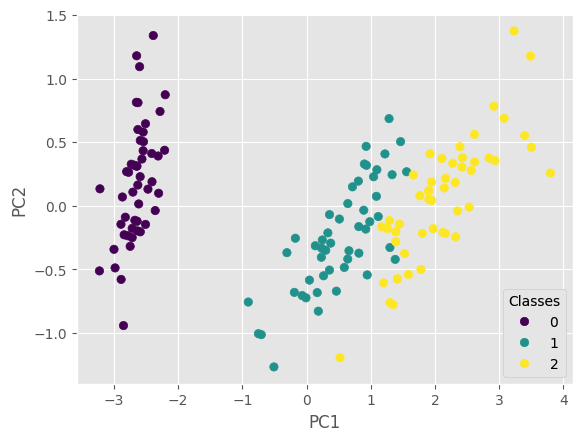

In [109]:
# irisデータセットを読み込む
iris = load_iris()
X = iris.data  # 特徴量
y = iris.target  # ターゲット変数

# 主成分分析のインスタンス化（2次元に削減）
pca = PCA(n_components=2)

# PCAを実行
X_pca = pca.fit_transform(X)

# 主成分分析で得られた結果をプロット
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')

# 凡例を追加（irisの種類を表示）
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

## モデルの評価

In [122]:
iris = load_iris()
X, y = iris.data[:100,:], iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# SVMのインスタンス化
svm = SVC()
# SVMで学習
svm.fit(X_train, y_train)
# テストデータの予測
y_pred = svm.predict(X_test)
# 適合率、再現率、F値を出力
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### digitを用いての予測

In [125]:
# digitsデータセットの読み込み
digits = load_digits()
X, y = digits.data, digits.target

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# SVMのインスタンス化
svm = SVC()

# SVMで学習
svm.fit(X_train, y_train)

# テストデータの予測
y_pred = svm.predict(X_test)

# 適合率、再現率、F値を出力
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.93      1.00      0.97        56
           2       1.00      1.00      1.00        53
           3       0.98      1.00      0.99        46
           4       0.98      1.00      0.99        61
           5       1.00      0.96      0.98        57
           6       1.00      0.98      0.99        57
           7       0.98      1.00      0.99        50
           8       0.98      0.94      0.96        48
           9       0.96      0.94      0.95        53

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



予測結果の解説に入る前に、具体的な結果を示すことはできませんが、一般的な解釈を提供することは可能です。`classification_report`が出力する指標には、適合率（precision）、再現率（recall）、F値（F1-score）、およびサポート（support）が含まれます。これらの指標を用いて、モデルの性能をクラスごとに評価することができます。

### 適合率（Precision）
適合率は、正と予測されたデータのうち、実際に正であったデータの割合です。つまり、モデルがどれだけ正確に正のクラスを予測できるかを示します。値が高いほど、誤って負のクラスを正と判断することが少ないことを意味します。

### 再現率（Recall）
再現率は、実際に正であるデータのうち、正と予測されたデータの割合です。この指標は、モデルが正のクラスを見逃さずにどれだけ捉えられるかを示します。値が高いほど、正のクラスを見逃すことが少ないことを意味します。

### F値（F1-Score）
F値は、適合率と再現率の調和平均で、これら二つのバランスを示します。適合率と再現率が共に重要で、そのトレードオフを考慮する場合に特に有用です。値が高いほど、適合率と再現率のバランスが良いことを意味します。

### サポート（Support）
サポートは、テストデータセットにおける各クラスの実際の出現回数です。これにより、データセットのクラス分布を理解することができます。

### 結果の解釈
- **各クラスの精度が高い場合**：各クラスに対する適合率、再現率、F値が高い場合、モデルはそのクラスを非常に正確に識別できていると言えます。これは、モデルがその数字の特徴をうまく学習し、正確に分類できていることを意味します。
  
- **特定のクラスで精度が低い場合**：あるクラスの指標が他のクラスに比べて顕著に低い場合、モデルがその特定の数字の特徴をうまく捉えられていない可能性があります。これは、データの不均衡、特徴量の選択、またはモデルのパラメータ設定に問題があることを示唆しているかもしれません。

- **適合率と再現率のトレードオフ**：適合率が高く再現率が低い、またはその逆の場合、モデルが特定のタイプの誤りをする傾向があることを示しています。例えば、適合率が高く再現率が低い場合、モデルは非常に慎重に正のクラスを予測していますが、それによって多くの正の例を見逃している可能性があります。

結果を具体的に理解するためには、これらの指

標を各数字（クラス0から9）に対して詳細に見ていく必要があります。また、改善が必要な領域があれば、データの前処理、特徴選択、モデルのパラメータチューニングなどを通じてモデルを改善することができます。

## 交差検証

In [128]:
iris = load_iris()
X, y = iris.data[:100,:], iris.target[:100]
# SVMをインスタンス化
svc = SVC()
# 10分割の交差検証を実施
cross_val_score(svc, X, y, cv=10, scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### ROC曲線とAUC

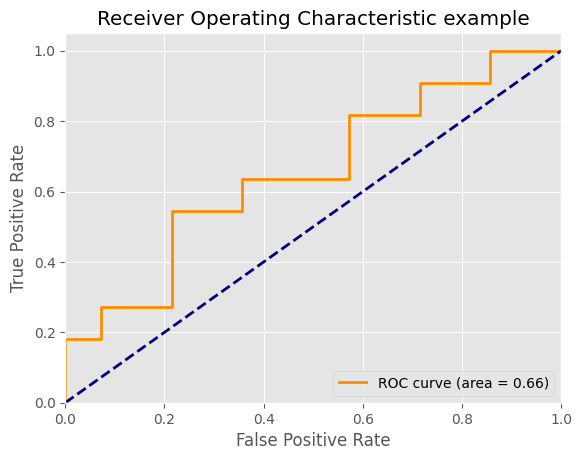

(0.6558441558441558,
 array([0.        , 0.        , 0.        , 0.07142857, 0.07142857,
        0.21428571, 0.21428571, 0.35714286, 0.35714286, 0.57142857,
        0.57142857, 0.71428571, 0.71428571, 0.85714286, 0.85714286,
        1.        ]),
 array([0.        , 0.09090909, 0.18181818, 0.18181818, 0.27272727,
        0.27272727, 0.54545455, 0.54545455, 0.63636364, 0.63636364,
        0.81818182, 0.81818182, 0.90909091, 0.90909091, 1.        ,
        1.        ]),
 array([1.98, 0.98, 0.95, 0.9 , 0.87, 0.8 , 0.63, 0.51, 0.47, 0.35, 0.28,
        0.22, 0.19, 0.12, 0.08, 0.01]))

In [130]:

# 合成データセットの作成
# 予測確信度スコア（信頼度スコア）
scores = np.array([
    0.98, 0.95, 0.90, 0.87, 0.85, 0.80, 0.75, 0.71, 0.63, 0.55,
    0.51, 0.47, 0.43, 0.38, 0.35, 0.31, 0.28, 0.24, 0.22, 0.19,
    0.15, 0.12, 0.08, 0.04, 0.01
])

# 実際のクラスラベル（1は正のクラス、0は負のクラス）
# 画像では「適合した」と記述されているものを1、「適合しなかった」を0とする
labels = np.array([
    1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
    0, 0, 1, 0, 0
])

# ROC曲線の計算
fpr, tpr, thresholds = roc_curve(labels, scores)
roc_auc = auc(fpr, tpr)

# ROC曲線のプロット
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()

# ROC曲線とAUCの値の出力
roc_auc, fpr, tpr, thresholds


## ハイパーパラメーターの最適化